In [8]:
import os
import matplotlib.pyplot as plt

from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots

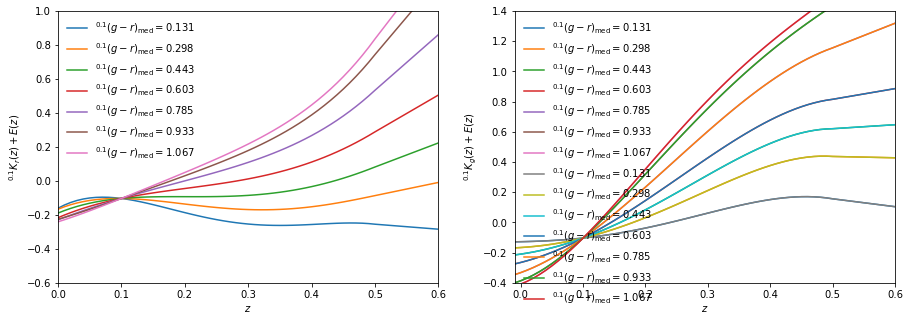

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_plots(axes)

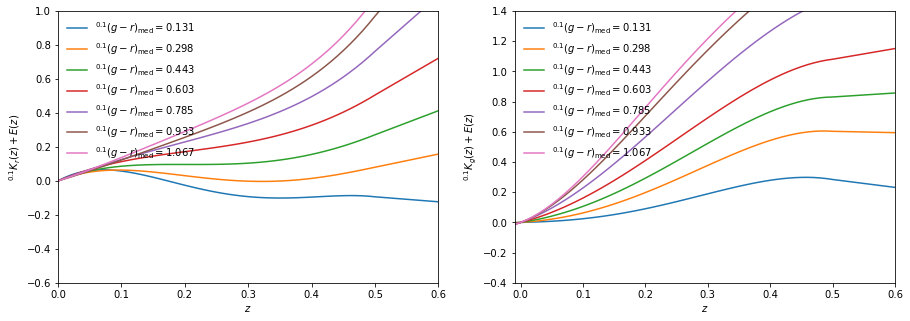

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_nonnative_plots(axes, 0.0)

In [11]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,Mpc,mag,,,,,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154,1.0760765,0.8610029493925443,0.0,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527,0.7318821,0.6893753080282159,0.0,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693,1.2004261,0.9721022317088284,0.0,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388,0.41841125,0.3893481424147275,0.0,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425,0.24911118,0.25921542614595333,0.0,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465,0.46534348,0.3271754608358587,0.0,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846,1.4639511,1.0187620089417166,0.0,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,39.25746923929414,0.8774986,0.6616306307163672,0.0,-0.027243027797297995,0.1886249681953192,0.1935241661150005,0.4755138903473121,0.5955089024766728,2.12,-0.1987821,-0.43445155


# Done.